In [117]:
import pandas as pd
import numpy as np

In [118]:
df = pd.read_csv('emotion_dataworld.csv') 
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [120]:
df = df.rename(columns={"sentiment": "Emotion", "content": "Text"})

In [121]:
df.drop( df[ (df['Emotion'] == 'neutral')].index, inplace=True)

In [122]:
df = df.reset_index()

In [ ]:
df = df.drop(['index','tweet_id','author'], axis = 1)

In [123]:
df

,index,Emotion,Text
0,0,empty,@tiffanylue i know i was listenin to bad habi...
1,1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,2,sadness,Funeral ceremony...gloomy friday...
3,3,enthusiasm,wants to hang out with friends SOON!
4,5,worry,Re-pinging @ghostridah14: why didn't you go to...
...,...,...,...
31357,39994,happiness,Succesfully following Tayla!!
31358,39996,love,Happy Mothers Day All my love
31359,39997,love,Happy Mother's Day to all the mommies out ther...
31360,39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [124]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

In [125]:
df['Emotion'].value_counts()

worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: Emotion, dtype: int64

In [126]:
df['Emotion'][df['Emotion']== 'worry'] = 'fear'
df['Emotion'][df['Emotion']== 'hate'] = 'anger'
df['Emotion'][df['Emotion']== 'happiness'] = 'happy'
df['Emotion'][df['Emotion']== 'fun'] = 'happy'
df['Emotion'][df['Emotion']== 'empty'] = 'sadness'
df['Emotion'][df['Emotion']== 'relief'] = 'happy'
df['Emotion'][df['Emotion']== 'enthusiasm'] = 'happy'
df['Emotion'][df['Emotion']== 'boredom'] = 'sadness'

C:\Users\Apprenant\anaconda3\envs\caret\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Apprenant\anaconda3\envs\caret\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Apprenant\anaconda3\envs\caret\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Apprenant\anaconda3\envs\caret\lib\site-pac

In [127]:
df

,index,Emotion,Text
0,0,sadness,@tiffanylue i know i was listenin to bad habi...
1,1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,2,sadness,Funeral ceremony...gloomy friday...
3,3,happy,wants to hang out with friends SOON!
4,5,fear,Re-pinging @ghostridah14: why didn't you go to...
...,...,...,...
31357,39994,happy,Succesfully following Tayla!!
31358,39996,love,Happy Mothers Day All my love
31359,39997,love,Happy Mother's Day to all the mommies out ther...
31360,39998,happy,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [128]:
df['Emotion'].value_counts()

happy       9270
fear        8459
sadness     6171
love        3842
surprise    2187
anger       1433
Name: Emotion, dtype: int64

In [129]:
fold_no = 1
for train_index, test_index in skf.split(df, df['Emotion']):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    fold_no += 1

In [130]:
import texthero as hero

In [131]:
train['clean_text'] = hero.clean(train['Text'])

In [132]:
train['tfidf_clean_text'] = hero.tfidf(train['clean_text'])

In [133]:
train['pca_tfidf_clean_text'] = hero.pca(train['tfidf_clean_text'])

In [134]:
hero.scatterplot(train, col='pca_tfidf_clean_text', color='Emotion', title="Feelings")

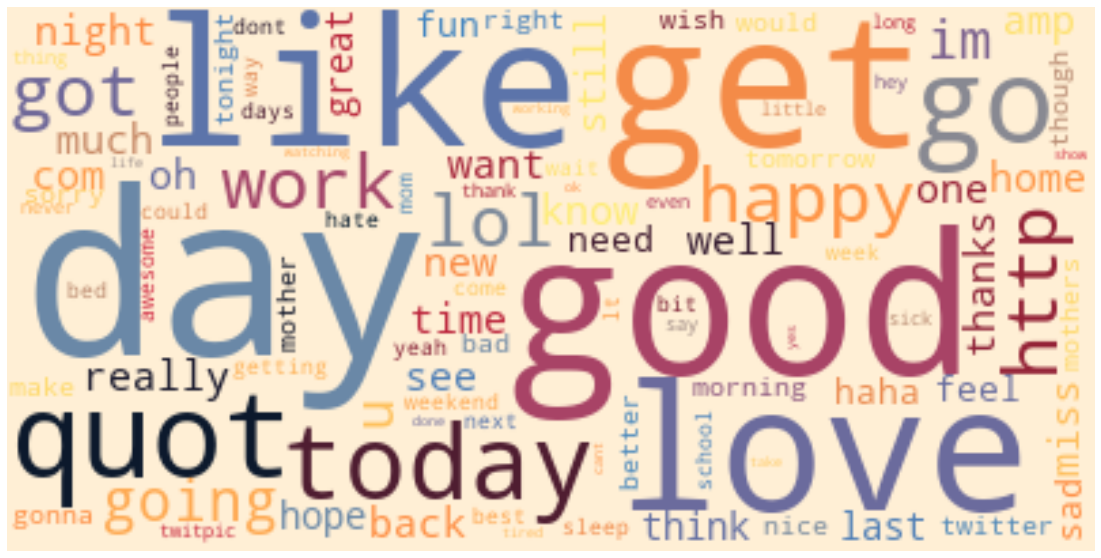

In [135]:
hero.wordcloud(train.clean_text, max_words=100)

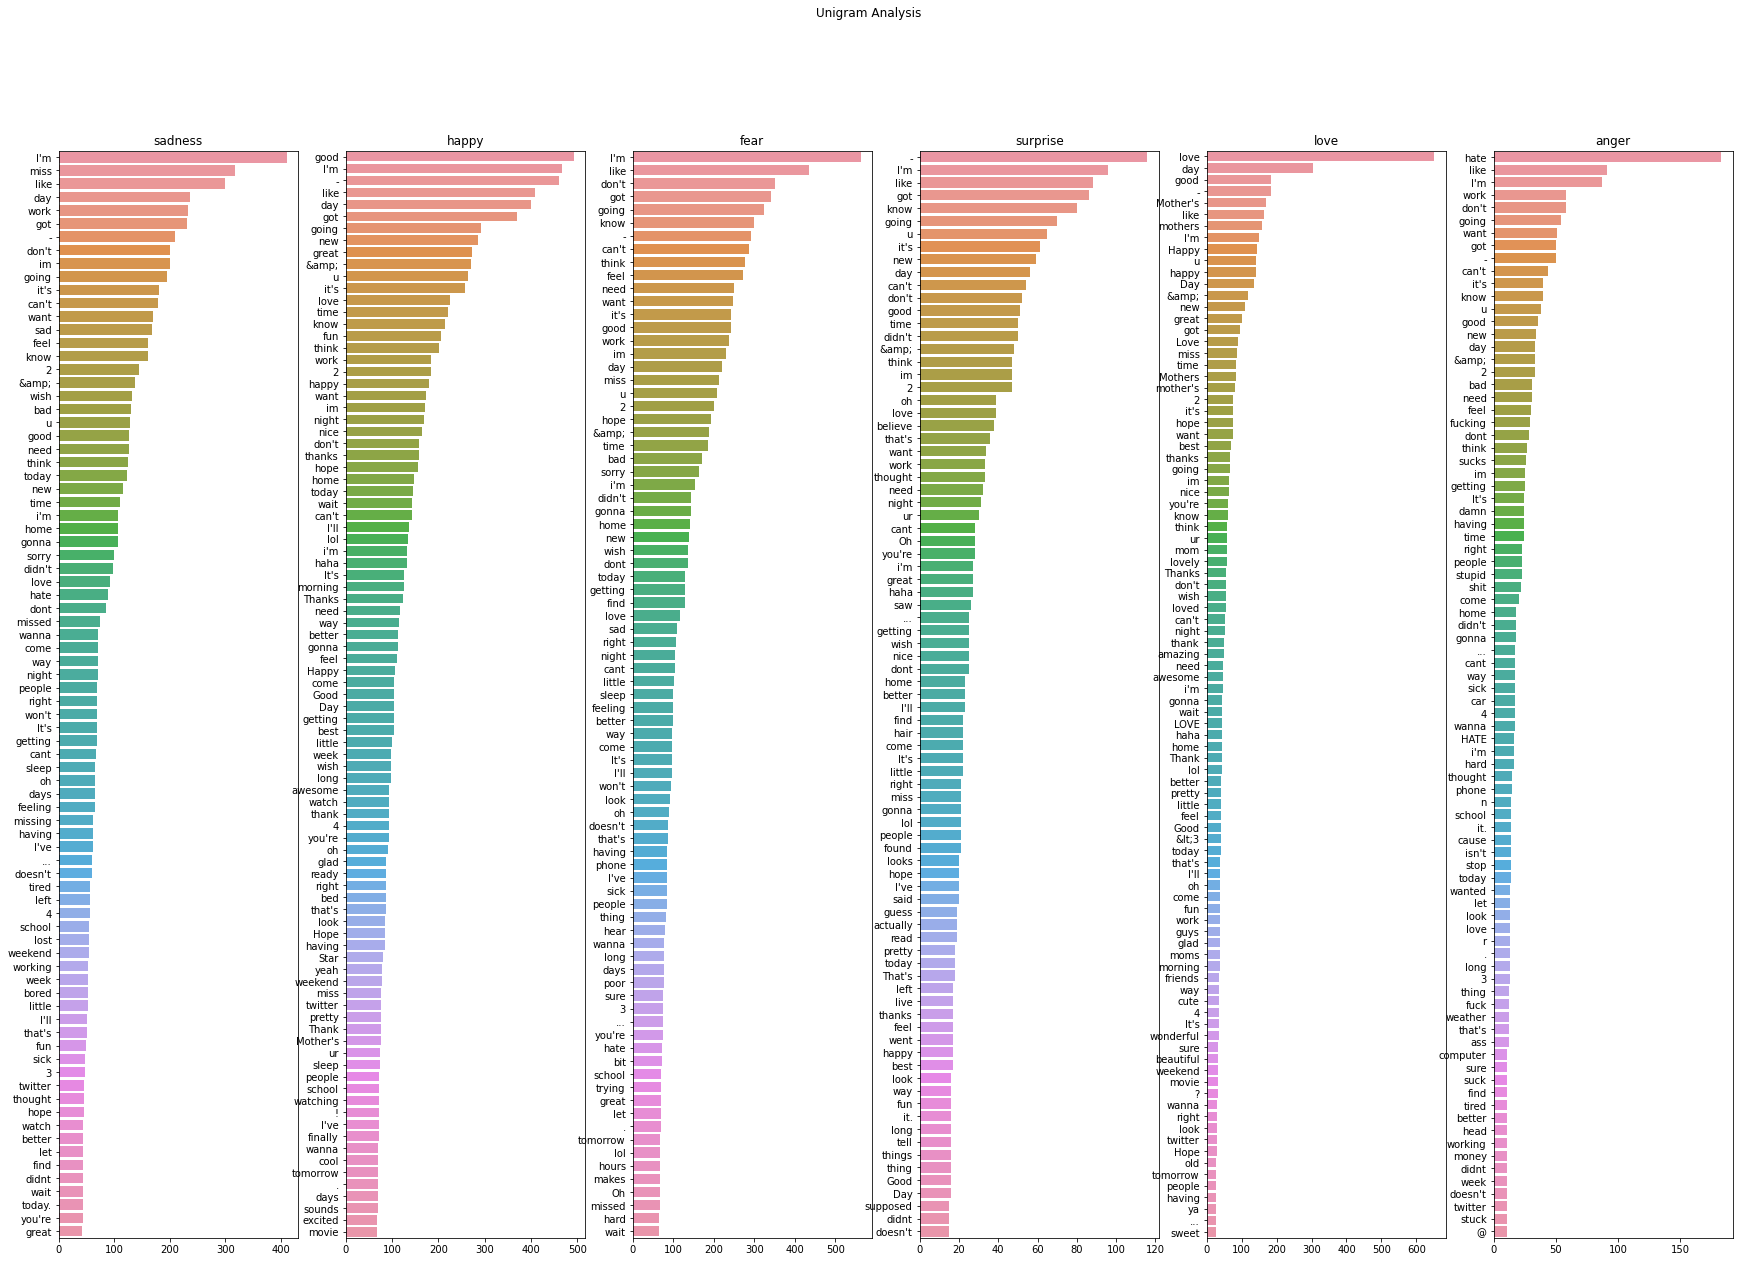

In [136]:
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter

fig, axes = plt.subplots(1,len(df['Emotion'].unique()), figsize=(30,20))
fig.suptitle('Unigram Analysis')

for index,emotion in enumerate(df['Emotion'].unique()):
    dct=defaultdict(int) 
    curdf=df[df['Emotion']==emotion]  
    allwordsarr=curdf['Text'].str.cat().split()
    counter=Counter(allwordsarr)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:200]:
        if (word.lower() not in STOP_WORDS):
            x.append(word)
            y.append(count)
    sns.barplot(ax=axes[index],x=y,y=x)
    axes[index].set_title(str(emotion))

In [157]:
NUM_TOP_WORDS = 10

train.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion          
anger     hate       151
          sucks       57
          damn        38
          bad         36
          stupid      33
          ugh         31
          shit        30
          fucking     25
          fuck        24
          people      24
fear      sorry      229
          hope       205
          bad        200
          miss       184
          would      137
          sleep      131
          sick       130
          love       125
          getting    124
          gonna      118
happy     great      315
          fun        284
          morning    238
          love       215
          hope       208
          nice       203
          awesome    181
          week       143
          wait       139
          better     138
love      love       666
          mothers    225
          mom        120
          great      111
          lt          99
          miss        84
          hope        81
          best        77
          thank       77
       

In [156]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["twitter","mother","new","happy","haha","thanks","need","weekend","much","tonight","wish","well","sad","last","see","oh","amp","tomorrow","night","good","lol","still","could","com","home","back","http","quot","day","today","really","one","go","get","i'm","I'm","im","got","it's","like","don't","dont","work","know","want","think","time","u","-","going","feel","can't"]))
train['clean_text'] = hero.remove_stopwords(train['clean_text'], custom_stopwords)

In [139]:
import fasttext

In [159]:
df_train = pd.DataFrame(data= np.c_[train['Text'], train['Emotion']], columns= ['Text','Emotion'])
df_test = pd.DataFrame(data= np.c_[test['Text'], test['Emotion']], columns= ['Text','Emotion'])

In [216]:
df_train['clean_text'] = hero.clean(df_train['Text'])
df_test['clean_text'] = hero.clean(df_test['Text'])
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["twitter","mother","weekend","much","tonight","wish","well","last","see","amp","tomorrow","night","still","could","com","home","back","http","quot","day","today","really","one","go","get","i'm","I'm","im","got","it's","like","know","want","think","time","u","-","going","feel","can't"]))

df_train['clean_text'] = hero.remove_stopwords(df_train['clean_text'], custom_stopwords)
df_test['clean_text'] = hero.remove_stopwords(df_test['clean_text'], custom_stopwords)

In [161]:
# je remplace ma colonne target  par son label 

df_train["Emotion"] = df_train[["Emotion"]].apply(lambda x: '__label__' + x)

# je fais pareil pour le jeu de test

df_test["Emotion"] = df_test[["Emotion"]].apply(lambda x: '__label__' + x)

In [217]:
# Saving the CSV file as a text file to train/test the classifier
import csv
df_train[['Emotion', 'clean_text']].to_csv('train_dw.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
df_test[['Emotion', 'clean_text']].to_csv('test_dw.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [257]:
model = fasttext.train_supervised('train_dw.txt', wordNgrams = 2, loss='softmax')

In [258]:
model.test('test_dw.txt')  

(7840, 0.4433673469387755, 0.4433673469387755)

In [215]:
model.save_model("model_dw_4433.ftz")